##**Step 1: Install CRAFT**

Install the open source project CRAFT-pytorch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os.path import exists, join, basename, splitext

# Define the Git repository URL
git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'

# Split the file extension from the repository URL and print it
print(splitext(basename(git_repo_url)))

# Extract the project name from the repository URL
project_name = splitext(basename(git_repo_url))[0]

# Check if the project directory already exists
if not exists(project_name):
    # Clone the repository and install dependencies
    !git clone -q {git_repo_url}
    #!cd {project_name} && pip install -q -r requirements.txt

import sys
sys.path.append(project_name)

import time
import matplotlib
import matplotlib.pylab as plt

# Configure matplotlib to disable grid lines in plots
plt.rcParams["axes.grid"] = False


('CRAFT-pytorch', '.git')


## **STEP 2 : Download pretrained model**

In [ ]:
def download_from_google_drive(file_id, file_name):
    # Download a file from the Google Drive link
    !rm -f ./cookie
    !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null

    # Extract the confirmation text from the cookie
    confirm_text = !awk '/download/ {print $NF}' ./cookie
    confirm_text = confirm_text[0]

    # Download the file using the confirmation text and file ID
    !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}


pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
    # Download the pretrained model if it doesn't exist
    !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

# Path to the image folder
# image_folder_path = '/content/drive/MyDrive/img'
image_folder_path = '/content/drive/MyDrive/FINAL_RP/train/images'
count=0

# Directory to download the images
download_dir = '/content/trainNEW'

# Create the download directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Iterate over the files in the image folder
for file_name in os.listdir(image_folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.png') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
        # Path to the current image file
        image_file_path = os.path.join(image_folder_path, file_name)

        # Extract the image file name
        image_file_name = os.path.basename(image_file_path)

        # Copy the image file to the download directory
        download_path = os.path.join(download_dir, image_file_name)
        shutil.copy(image_file_path, download_path)

        # Load the image using matplotlib
        # print(image_file_name)
        img = mpimg.imread(download_path)
        count=count+1

        # Perform CRAFT detection on the image
        # ... Your CRAFT detection code goes here ...

        # Display the image with detections
        # plt.imshow(img)
        # plt.show()

##**STEP 3: Implement CRAFT and download the results**

In [ ]:
count

965

In [ ]:
count*3

2895

In [ ]:
!cd {project_name} && python test.py --trained_model=/content/{pretrained_model} --test_folder=/content/trainNEW

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (/content/craft_mlt_25k.pth)
elapsed time : 238.41354608535767s


In [ ]:
import os

folder_path = "/content/CRAFT-pytorch/result"  # replace with your actual folder path
files = os.listdir(folder_path)
num_files = len(files)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 2988


In [ ]:
!zip -r /content/trainnew.zip /content/CRAFT-pytorch/result

  adding: content/CRAFT-pytorch/result/ (stored 0%)
  adding: content/CRAFT-pytorch/result/res_1229.jpg (deflated 3%)
  adding: content/CRAFT-pytorch/result/res_1304.jpg (deflated 2%)
  adding: content/CRAFT-pytorch/result/res_1216_mask.jpg (deflated 4%)
  adding: content/CRAFT-pytorch/result/res_1254_mask.jpg (deflated 8%)
  adding: content/CRAFT-pytorch/result/res_1288.txt (deflated 3%)
  adding: content/CRAFT-pytorch/result/res_1221.txt (deflated 38%)
  adding: content/CRAFT-pytorch/result/res_1295.jpg (deflated 2%)
  adding: content/CRAFT-pytorch/result/res_1281.txt (deflated 42%)
  adding: content/CRAFT-pytorch/result/res_1224_mask.jpg (deflated 36%)
  adding: content/CRAFT-pytorch/result/res_1274.txt (deflated 22%)
  adding: content/CRAFT-pytorch/result/res_1298.txt (deflated 43%)
  adding: content/CRAFT-pytorch/result/res_1273_mask.jpg (deflated 16%)
  adding: content/CRAFT-pytorch/result/res_1291.txt (deflated 44%)
  adding: content/CRAFT-pytorch/result/res_1228_mask.jpg (defla

In [ ]:
from google.colab import files
files.download("/content/downloadCropped.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**STEP 4 : Convert CRAFT Annotations to YOLO Annotations**

Download the YOLO annotations

In [ ]:
def calculate_quadrilateral_center(vertices):
    # Assuming vertices is a list of tuples [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
    # Calculate centroids of two triangles formed by the quadrilateral
    triangle1_vertices = [vertices[0], vertices[1], vertices[2]]
    triangle2_vertices = [vertices[0], vertices[2], vertices[3]]

    centroid_triangle1 = calculate_triangle_centroid(triangle1_vertices)
    centroid_triangle2 = calculate_triangle_centroid(triangle2_vertices)

    # Calculate the center as the average of the centroids of the two triangles
    center_x = (centroid_triangle1[0] + centroid_triangle2[0]) / 2.0
    center_y = (centroid_triangle1[1] + centroid_triangle2[1]) / 2.0

    return (center_x, center_y)

# Function to calculate triangle centroid
def calculate_triangle_centroid(vertices):
    x_sum = sum(vertex[0] for vertex in vertices)
    y_sum = sum(vertex[1] for vertex in vertices)

    centroid_x = x_sum / 3.0
    centroid_y = y_sum / 3.0

    return (centroid_x, centroid_y)

# Example usage:
quadrilateral_vertices = [(100, 50), (200, 50), (200, 150), (100, 150)]  # Replace with your quadrilateral vertices

center = calculate_quadrilateral_center(quadrilateral_vertices)
print("Center coordinates:", center)

Center coordinates: (150.0, 100.0)


In [ ]:
def craft_to_yolo(points, image_width, image_height):
    # x1(0),y1(1),x2(2),y2(3),x3(4),y3(5),x4(6),y4(7)

    # Extract quadrilateral vertices
    quadrilateral_vertices = [
        (points[0], points[1]),
        (points[2], points[3]),
        (points[4], points[5]),
        (points[6], points[7])
    ]

    # Calculate the center of the quadrilateral
    center = calculate_quadrilateral_center(quadrilateral_vertices)

    # Normalize coordinates
    x_center = center[0] / image_width
    y_center = center[1] / image_height
    box_width = abs(points[2] - points[0]) / image_width
    box_height = abs(points[5] - points[1]) / image_height

    class_id = 1  # Assuming a single class

    yolo_annotation = f"{class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"
    return yolo_annotation

In [ ]:
def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")

    return folder_path

In [ ]:
from PIL import Image

In [ ]:
craft_annotations_folder = '/content/CRAFT-pytorch/result'
file_path = ""
annotation_files = os.listdir(craft_annotations_folder)

yolo_annotations_folder = create_folder_if_not_exists("/content/YOLOENG_annotations")

for annotation_file in annotation_files:
  if annotation_file.endswith('txt'):
    file_path = os.path.join(craft_annotations_folder,annotation_file)
    with open(file_path, 'r') as file:
      for line in file:
        points = list(map(int,line.split(",")))
        file_path = file_path.replace("txt","jpg")
        image = Image.open(os.path.join(craft_annotations_folder,file_path))
        width,height = image.size

        with open(os.path.join(yolo_annotations_folder,annotation_file), 'a') as yolo_file:
            yolo_annotation = craft_to_yolo(points, width, height)
            yolo_file.write(yolo_annotation + '\n')

Folder '/content/YOLOENG_annotations' created.


In [ ]:
file_list = os.listdir(yolo_annotations_folder)
print(len(file_list))

file_list = os.listdir(craft_annotations_folder)
print(int(len(file_list)/3))

111
111


In [ ]:
!zip -r /content/yoloAnnotations.zip /content/YOLOENG_annotations

  adding: content/YOLOENG_annotations/ (stored 0%)
  adding: content/YOLOENG_annotations/res_1288.txt (deflated 5%)
  adding: content/YOLOENG_annotations/res_1221.txt (deflated 38%)
  adding: content/YOLOENG_annotations/res_1281.txt (deflated 44%)
  adding: content/YOLOENG_annotations/res_1274.txt (deflated 34%)
  adding: content/YOLOENG_annotations/res_1298.txt (deflated 48%)
  adding: content/YOLOENG_annotations/res_1291.txt (deflated 48%)
  adding: content/YOLOENG_annotations/res_1244.txt (deflated 45%)
  adding: content/YOLOENG_annotations/res_1238.txt (deflated 11%)
  adding: content/YOLOENG_annotations/res_1292.txt (deflated 57%)
  adding: content/YOLOENG_annotations/res_1280.txt (deflated 43%)
  adding: content/YOLOENG_annotations/res_1257.txt (deflated 39%)
  adding: content/YOLOENG_annotations/res_1230.txt (deflated 39%)
  adding: content/YOLOENG_annotations/res_1307.txt (deflated 58%)
  adding: content/YOLOENG_annotations/res_1283.txt (deflated 40%)
  adding: content/YOLOENG_

In [ ]:
from google.colab import files
files.download("/content/yoloAnnotations.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**STEP 4 : INSTALL AND IMPORT THE YOLO MODEL**

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 350MB/s]


##**STEP 5 : TRAIN THE MODEL**

In [ ]:
model.train(data = "/content/drive/MyDrive/FINAL_RP/config.yaml",epochs=50)

Ultralytics YOLOv8.0.211 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/FINAL_RP/config.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c249790ec80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
import locale

locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo predict model='/content/best.pt' source='/content/res.jpg' conf = 0.6

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/res.jpg: 384x640 5 kannadas, 116.8ms
Speed: 2.5ms preprocess, 116.8ms inference, 557.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from PIL import Image
from ultralytics import YOLO
import os

# Load the YOLOv8 model
model = YOLO('/content/best.pt')

# Run inference on the image
results = model('/content/res.jpg', conf=0.6)

# Get the original image
original_image = Image.open('/content/res.jpg')

# Define the classes you want to save
classes_to_save = ['kannada']

# Create a folder to save the cropped images if it doesn't exist
output_folder = '/content/cropped_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate through the detected objects
for i, result in enumerate(results):
    for bbox, cls in zip(result.boxes.xyxy, result.names):
        xmin, ymin, xmax, ymax = map(int, bbox.tolist())  # Convert tensor to list of ints
        # Check if the detected object belongs to one of the specified classes
        if cls in classes_to_save:
            # Crop the detected object from the original image
            cropped_object = original_image.crop((xmin, ymin, xmax, ymax))
            # Save the cropped object to the output folder
            cropped_object.save(os.path.join(output_folder, f'cropped_object_{i}_{cls}.jpg'))



image 1/1 /content/res.jpg: 384x640 5 kannadas, 25.8ms
Speed: 1.5ms preprocess, 25.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



image 1/1 /content/res.jpg: 384x640 7 kannadas, 1 english, 34.1ms
Speed: 2.0ms preprocess, 34.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


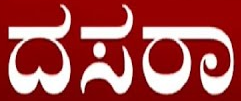

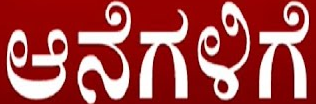

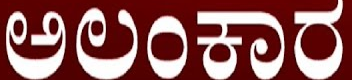

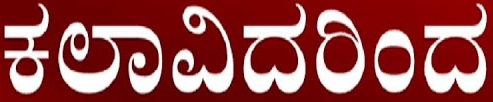

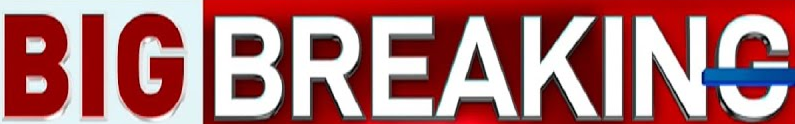

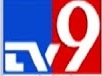

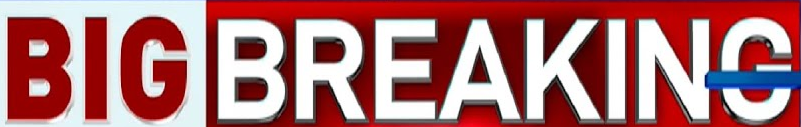

In [ ]:
from PIL import Image
from ultralytics import YOLO
from IPython.display import display

# Load the YOLOv8 model
model = YOLO('/content/best.pt')

# Run inference on the image
results = model('/content/res.jpg')

# Get the original image
original_image = Image.open('/content/res.jpg')

# Iterate through the detected objects
for i, result in enumerate(results):
    for bbox in result.boxes.xyxy:
        xmin, ymin, xmax, ymax = map(int, bbox.tolist())  # Convert tensor to list of ints
        # Crop the detected object from the original image
        cropped_object = original_image.crop((xmin, ymin, xmax, ymax))
        # Display the cropped object
        display(cropped_object)
        # Optionally, save the cropped object
        cropped_object.save(f'cropped_object_{i}.jpg')  # Save the cropped object


image 1/1 /content/res.jpg: 384x640 5 kannadas, 26.1ms
Speed: 1.9ms preprocess, 26.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


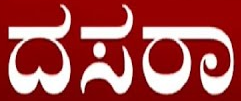

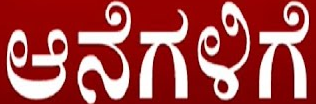

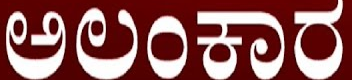

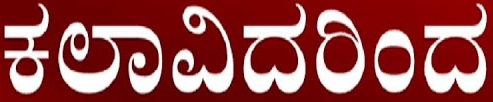

In [ ]:
from PIL import Image
from ultralytics import YOLO
from IPython.display import display

# Load the YOLOv8 model
model = YOLO('/content/best.pt')

# Run inference on the image
results = model('/content/res.jpg', conf = 0.6, classes = [0])

# Get the original image
original_image = Image.open('/content/res.jpg')
count = 0
# Iterate through the detected objects
for i, result in enumerate(results):
    for bbox in result.boxes.xyxy:
        xmin, ymin, xmax, ymax = map(int, bbox.tolist())  # Convert tensor to list of ints
        # Crop the detected object from the original image
        cropped_object = original_image.crop((xmin, ymin, xmax, ymax))
        # Display the cropped object
        display(cropped_object)
        # Optionally, save the cropped object
        cropped_object.save(f'cropped_object_{count}.jpg')  # Save the cropped object
        count+=1

##**ADDITIONAL CODES** (NOT RUNNABLE)

In [ ]:
import os

# Use a raw string (r) to avoid issues with backslashes
folder_path = r'C:\Users\anosh\OneDrive\Desktop\try'

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt') and filename.startswith('res_'):
        # Generate the new filename without the 'res_' prefix
        new_filename = os.path.join(folder_path, filename.replace('res_', '', 1))

        # Rename the file
        os.rename(os.path.join(folder_path, filename), new_filename)
        print(f"Renamed: {filename} to {new_filename}")

SPLIT DATASETS INTO IMAGES AND LABELS

In [ ]:
import os
import shutil

# Set the source directory containing both .jpg and .txt files
source_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try'

# Set the destination directories for images and labels
images_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\images'
labels_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\labels'

# Create the "images" and "labels" directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Iterate through the files and move them to the appropriate directories
for i in range(1, 327):  # Assuming your files start from 001.jpg and go up to 326.jpg
    # Construct the filenames for .jpg and .txt files
    image_filename = f'{i:03d}.jpg'
    label_filename = f'{i:03d}.txt'

    # Move .jpg files to the "images" directory
    src_image = os.path.join(source_dir, image_filename)
    dst_image = os.path.join(images_dir, image_filename)
    shutil.move(src_image, dst_image)

    # Move .txt files to the "labels" directory
    src_label = os.path.join(source_dir, label_filename)
    dst_label = os.path.join(labels_dir, label_filename)
    shutil.move(src_label, dst_label)

print("Dataset split into 'images' and 'labels' completed.")

SPLIT THEM INTO TRAIN AND VAL (80:20 SPLIT)

In [ ]:
import os
import random
import shutil

# Set the paths to the "images" and "labels" directories
images_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\images'
labels_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\labels'

# Set the paths to the "train" and "val" directories
train_images_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\train\\images'
train_labels_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\train\\labels'
val_images_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\val\\images'
val_labels_dir = 'C:\\Users\\anosh\\OneDrive\\Desktop\\try\\val\\labels'

# Create the "train" and "val" directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image files in the "images" directory
image_files = os.listdir(images_dir)

# Shuffle the list of image files for randomness
random.shuffle(image_files)

# Calculate the split index based on an 80:20 ratio
split_index = int(0.8 * len(image_files))

# Split the images into train and val sets
train_images = image_files[:split_index]
val_images = image_files[split_index:]

# Move the image files to their respective train and val directories
for image_file in train_images:
    src_image_path = os.path.join(images_dir, image_file)
    dst_image_path = os.path.join(train_images_dir, image_file)
    shutil.move(src_image_path, dst_image_path)

    # Corresponding label file
    label_file = image_file.replace('.jpg', '.txt')
    src_label_path = os.path.join(labels_dir, label_file)
    dst_label_path = os.path.join(train_labels_dir, label_file)
    shutil.move(src_label_path, dst_label_path)

for image_file in val_images:
    src_image_path = os.path.join(images_dir, image_file)
    dst_image_path = os.path.join(val_images_dir, image_file)
    shutil.move(src_image_path, dst_image_path)

    # Corresponding label file
    label_file = image_file.replace('.jpg', '.txt')
    src_label_path = os.path.join(labels_dir, label_file)
    dst_label_path = os.path.join(val_labels_dir, label_file)
    shutil.move(src_label_path, dst_label_path)

print("Dataset split into 'train' and 'val' completed.")